In [1]:
import pandas as pd #for dealing with csv import
import os # for joining paths and filenames sensibly
import numpy as np #for the population std
import glob # for finding csv data Çfiles

## Data processing

In [17]:
os.getcwd()

'C:\\Users\\David\\Documents\\GitHub\\OpenBrains\\Diana_analysis'

In [18]:
#path_folder_all = 'C:\\Users\\David\\Desktop\\OpenBrains\\balanced_brains\\diana_sopeña'
path_folder_all = 'C:\\Users\\David\\Desktop\\OpenBrains\\balanced_brains\\diana_balaguer'

In [19]:
search_string=os.path.join(path_folder_all,'*.xlsx') 
files = glob.glob(search_string) #list of data files in the named location
files

['C:\\Users\\David\\Desktop\\OpenBrains\\balanced_brains\\diana_balaguer\\Feedback experiment (1).xlsx',
 'C:\\Users\\David\\Desktop\\OpenBrains\\balanced_brains\\diana_balaguer\\Feedback experiment.xlsx']

In [20]:
#Get summary dataframe

summary=[]

for filenum, filename in enumerate(files):
    print(filename)
    ##
    filepath =os.path.join(path_folder_all,filename) 
    xl = pd.ExcelFile(filepath)
    sheet_names = xl.sheet_names
    ##
    for idx, group in enumerate(sheet_names):

        df_gx = pd.read_excel(filepath, sheet_name=sheet_names[idx])

        if not df_gx.iloc[:,1].isnull().iloc[1]:

            for idx1, label in enumerate(['càstig', 'recompensa', 'guiatge']): ##each feedback type

                points = df_gx.iloc[1:, 1+idx1][~df_gx.iloc[1:, 1+idx1].isnull()].values ## remove the nan and convert to array

                print([points.sum(), np.round(points.mean(),2), points.shape[0], label, group ]) ##control mechanism

                summary.append([points.sum(), np.round(points.mean(),2), points.shape[0], label, group, filenum ])
            #
            
#
df = pd.DataFrame(summary)
df.columns=['sum', 'mean_points', '#thorws', 'feedback_type', 'group', 'filenum' ]    
            

C:\Users\David\Desktop\OpenBrains\balanced_brains\diana_balaguer\Feedback experiment (1).xlsx
[300, 33.33, 9, 'càstig', 'G01']
[780, 48.75, 16, 'recompensa', 'G01']
[1080, 67.5, 16, 'guiatge', 'G01']
[610, 30.5, 20, 'càstig', 'G02']
[250, 20.83, 12, 'recompensa', 'G02']
[970, 42.17, 23, 'guiatge', 'G02']
[90, 11.25, 8, 'càstig', 'G03']
[190, 11.18, 17, 'recompensa', 'G03']
[330, 18.33, 18, 'guiatge', 'G03']
[310, 25.83, 12, 'càstig', 'G04']
[450, 28.12, 16, 'recompensa', 'G04']
[730, 38.42, 19, 'guiatge', 'G04']
[340, 20.0, 17, 'càstig', 'G05']
[470, 29.38, 16, 'recompensa', 'G05']
[170, 12.14, 14, 'guiatge', 'G05']
[170, 56.67, 3, 'càstig', 'G06']
[0, 0.0, 3, 'recompensa', 'G06']
[10, 10.0, 1, 'guiatge', 'G06']
C:\Users\David\Desktop\OpenBrains\balanced_brains\diana_balaguer\Feedback experiment.xlsx
[500, 55.56, 9, 'càstig', 'G01']
[0, 0.0, 11, 'recompensa', 'G01']
[480, 43.64, 11, 'guiatge', 'G01']
[0, 0.0, 18, 'càstig', 'G02']
[410, 22.78, 18, 'recompensa', 'G02']
[500, 35.71, 14, '

In [21]:
df

,sum,mean_points,#thorws,feedback_type,group,filenum
0,300,33.33,9,càstig,G01,0
1,780,48.75,16,recompensa,G01,0
2,1080,67.50,16,guiatge,G01,0
3,610,30.50,20,càstig,G02,0
4,250,20.83,12,recompensa,G02,0
5,970,42.17,23,guiatge,G02,0
6,90,11.25,8,càstig,G03,0
7,190,11.18,17,recompensa,G03,0
8,330,18.33,18,guiatge,G03,0
9,310,25.83,12,càstig,G04,0


## Plots

In [22]:
import matplotlib.pyplot as plt  # Matplotlib's pyplot: MATLAB-like syntax
import seaborn as sns
sns.set_context("talk")

In [23]:
c_guiatge =  '#e59500'
c_recompensa= 'aquamarine' # '#002642'
c_castig= 'indianred'  # '#840032'

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Eficiència')

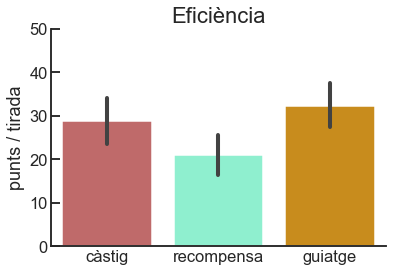

In [24]:
sns.barplot(data=df, x="feedback_type", y="mean_points", 
            order=['càstig', 'recompensa', 'guiatge'],
            ci=68,  palette=[c_castig, c_recompensa, c_guiatge])

plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.gca().set_ylim(0,50)
plt.xlabel('')
plt.ylabel('punts / tirada');
plt.title('Eficiència', fontsize=22)

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


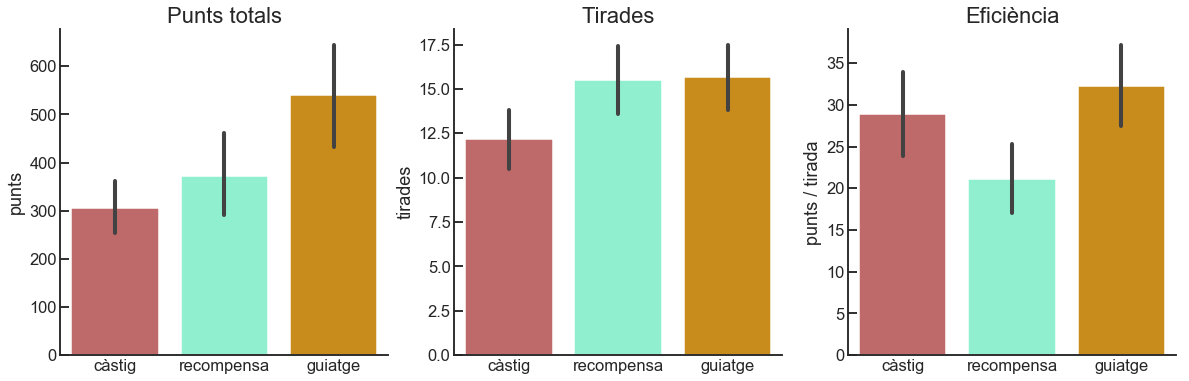

In [25]:
plt.figure(figsize=(20,6))

plt.subplot(131)
sns.barplot(data=df, x="feedback_type", y="sum", 
            order=['càstig', 'recompensa', 'guiatge'],
            ci=68,  palette=[c_castig, c_recompensa, c_guiatge])

plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
#plt.gca().set_ylim(0,80)
plt.xlabel('')
plt.ylabel('punts');
plt.title('Punts totals', fontsize=22)


plt.subplot(132)
sns.barplot(data=df, x="feedback_type", y="#thorws", 
            order=['càstig', 'recompensa', 'guiatge'],
            ci=68,  palette=[c_castig, c_recompensa, c_guiatge])

plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
#plt.gca().set_ylim(0,80)
plt.xlabel('')
plt.ylabel('tirades');
plt.title('Tirades', fontsize=22)


plt.subplot(133)
sns.barplot(data=df, x="feedback_type", y="mean_points", 
            order=['càstig', 'recompensa', 'guiatge'],
            ci=68,  palette=[c_castig, c_recompensa, c_guiatge])

plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
#plt.gca().set_ylim(0,80)
plt.xlabel('')
plt.ylabel('punts / tirada');
plt.title('Eficiència', fontsize=22);


In [26]:
from linares_plot import *

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\linares_plot.py:120: InstabilityWarning: Some values used top 10 low/high samples; results may be unstable.
  ci= bootstraps.ci(df.groupby(x).get_group(x_idx)[y], statfunction=statistic, n_samples=reps,  alpha=1-CI)    # calculate the bootstrap (data no subject base)
No handles with labels found to put in legend.


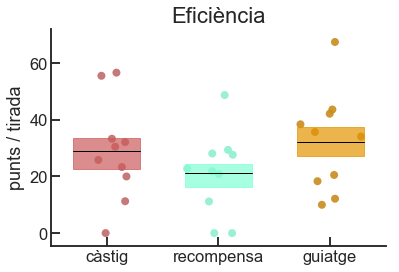

In [27]:
sns.set_context("talk")

linares_plot(x='feedback_type', y='mean_points', order=['càstig', 'recompensa', 'guiatge'], 
             df=df, palette=[c_castig, c_recompensa, c_guiatge], CI=0.68,  fill_box=True,  
             reps=100, alpha_box=0.7, alpha=0.9,  point_size=8, leg=False, sep_axis=False)

plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
#plt.gca().set_ylim(0,80)
plt.xlabel('')
plt.ylabel('punts / tirada');
plt.title('Eficiència', fontsize=22);


## Stats

In [28]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [29]:
###### Anova model
mod = ols(formula='mean_points ~ feedback_type', data=df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print( '                                 ')
print( '                                 Anova Table')
print( '==============================================================================')
print( aov_table)
print( '==============================================================================')
print( '                                 ')
print( '                                 ')
print( '                                 ')

####### Multiple comparisons
tukey = pairwise_tukeyhsd(endog=df['mean_points'].values, groups=df['feedback_type'].values,  alpha=0.05)
print( tukey.summary()    )



                                 
                                 Anova Table
                   sum_sq    df         F    PR(>F)
feedback_type   658.94168   2.0  1.193486  0.318655
Residual       7453.55399  27.0       NaN       NaN
                                 
                                 
                                 
 Multiple Comparison of Means - Tukey HSD,FWER=0.05
 group1   group2   meandiff  lower    upper  reject
---------------------------------------------------
 càstig  guiatge    3.392   -15.0277 21.8117 False 
 càstig recompensa  -7.802  -26.2217 10.6177 False 
guiatge recompensa -11.194  -29.6137  7.2257 False 
---------------------------------------------------
